In [2]:
using NCDatasets
using FileIO
using Statistics
using DelimitedFiles
using Plots
using Printf

In [6]:
#save_σ_hr()

Progress: 100%|█████████████████████████████████████████| Time: 0:01:33


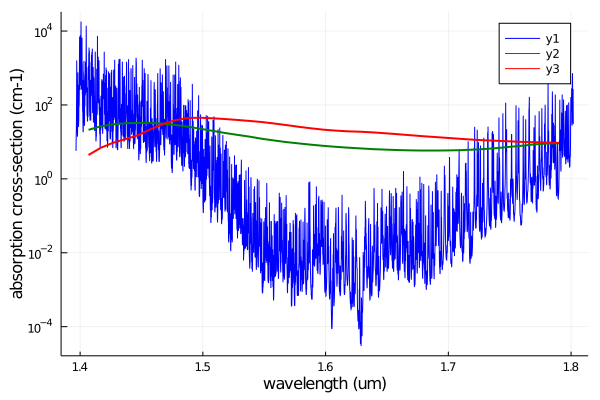

In [27]:
include("helper.jl")

hyp_wl, rad = read_Hyperion();
ν, k1 = make_vapor_xsection();
k2, k3 = read_Kuo_abs(hyp_wl);

plot_cross_sections(ν, k1, hyp_wl, k2, k3)

In [28]:
pts = [(5,10),(40,500),(80,1000),(120,1500),(160,2000),(200,2500),(240,3000)]

s = 20
rad_s = rad[:,s,:]'
p1 = heatmap(rad_s, clims=(0,3000), size=(400,500), title=@sprintf("radiance at %.3f (um)", hyp_wl[s]))
scatter!(pts, label="")
xlims!(0,256)
ylims!(0,3189)

p2 = plot()
for (i,j) in pts
    plot!(hyp_wl,rad[i,:,j], label="("*string(i)*", "*string(j)*")")
end
y = fwd_model([500, 10, 1e16, 1e-2, 1e-2])
plot!(hyp_wl,y)

xlims!(1.4,1.8)
ylims!(0,1000)
xlabel!("wavelength (um)")
ylabel!("radiance (W/m2/sr/um)")
plot(p1,p2,layout=(1,2),size=(800,500))

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 322001 and 39")

In [192]:
m = minimum(rad, dims=2)[:,1,:];
bad_indices = findall(x -> x < 0, m);
println(size(bad_indices))
println(bad_indices[1])

# p = plot()
# for i in range(1,length=50)
#     plot!(wl*1e-3,rad[bad_indices[i][1],:,bad_indices[i][2]],label="")
# end
# display(p)

(35292,)
CartesianIndex(129, 1)


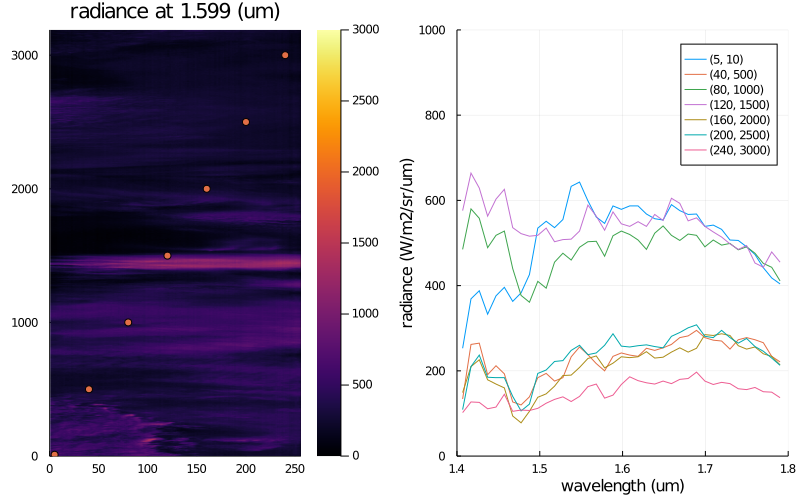

In [193]:
pts = [(5,10),(40,500),(80,1000),(120,1500),(160,2000),(200,2500),(240,3000)]

s = 20
rad_s = rad[:,s,:]'
p1 = heatmap(rad_s, clims=(0,3000), size=(400,500), title=@sprintf("radiance at %.3f (um)", wl[s]))
scatter!(pts, label="")
xlims!(0,256)
ylims!(0,3189)

p2 = plot()
for (i,j) in pts
    plot!(wl,rad[i,:,j], label="("*string(i)*", "*string(j)*")")
end
xlims!(1.4,1.8)
ylims!(0,1000)
xlabel!("wavelength (um)")
ylabel!("radiance (W/m2/sr/um)")

plot(p1,p2,layout=(1,2),size=(800,500))

[123.91264613076363, 342.4209671005392, 322.6372450489948, 305.7895750460727, 289.9418143366469, 290.80240556725016, 252.52658442953387, 243.6872503006314, 249.27582695140066, 260.4138260762511, 272.5101675072864, 284.8154320619468, 297.67605303948864, 309.9177908002145, 323.23995994257547, 337.4494494633655, 351.4357274391877, 364.63151447654576, 375.8569296615406, 385.24652760518154, 392.0008774218871, 396.84443576734213, 400.18666987011727, 404.48647162168766, 409.1780773606294, 414.00847267566473, 418.4983073787369, 422.6185399013145, 425.848118807005, 428.7620355889151, 431.47770439328616, 433.2790141403496, 434.28285096780024, 433.04182443361464, 433.50556522010504, 432.75071660030574, 429.0860059862131, 429.39439769395676, 426.8941955971597]

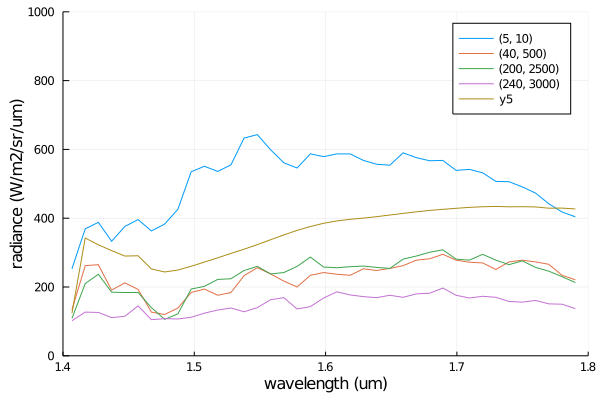

In [235]:
pts = [(5,10),(40,500),(80,1000),(120,1500),(160,2000),(200,2500),(240,3000)]
pts = [(5,10),(40,500),(200,2500),(240,3000)]

plot()
for (i,j) in pts
    plot!(wl,rad[i,:,j], label="("*string(i)*", "*string(j)*")")
end
xlims!(1.4,1.8)
ylims!(0,1000)
xlabel!("wavelength (um)")
ylabel!("radiance (W/m2/sr/um)")

k1 = 4π * σ_conv ./ wl * 1e4;
k2 = 4π * interp_k_liq ./ wl * 1e4;
k3 = 4π * interp_k_ice ./ wl * 1e4;

y = fwd_model([500, 10, 1e16, 1e-2, 1e-2])
print(y)
plot!(wl,y)